In [0]:
import os

In [0]:
import os
file=os.listdir("drive/My Drive/PROJECTS/pokemon")

In [4]:
for  i in file:
  print(i)

Train (1)
Test (2)
sample_submission.csv
pokemon.ipynb


In [33]:
from keras.preprocessing.image import ImageDataGenerator
train_ = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,
                            rotation_range=0.2,shear_range=0.2,
                            height_shift_range=0.2,
                            width_shift_range=0.2,zoom_range=0.2)
train= train_.flow_from_directory(
    '/content/drive/My Drive/PROJECTS/pokemon/Train (1)',
    target_size=(64,64),
    class_mode='categorical',
    
)

test_= ImageDataGenerator(rescale=1/255.0)
test=test_.flow_from_directory(
    '/content/drive/My Drive/PROJECTS/pokemon/Test (2)',
    target_size=(64,64),
    batch_size=16
)

Found 1642 images belonging to 10 classes.
Found 187 images belonging to 1 classes.


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(64,64,3), kernel_size=(3,3) , padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),  padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))



# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(128))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

# 2nd Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))

# 3rd Fully Connected Layer
model.add(Dense(128))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_67 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_68 (Activation)   (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)       

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
his=model.fit_generator(train,epochs=10,shuffle=True)

Epoch 1/10
37/52 [====================>.........] - ETA: 10s - loss: 0.6556 - accuracy: 0.7771

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


52/52 [==============================] - 35s 678ms/step - loss: 0.6685 - accuracy: 0.7783
Epoch 2/10
52/52 [==============================] - 35s 665ms/step - loss: 0.6527 - accuracy: 0.7881
Epoch 3/10
52/52 [==============================] - 35s 665ms/step - loss: 0.6350 - accuracy: 0.7862
Epoch 4/10
52/52 [==============================] - 35s 673ms/step - loss: 0.6144 - accuracy: 0.7942
Epoch 5/10
52/52 [==============================] - 36s 687ms/step - loss: 0.5790 - accuracy: 0.8161
Epoch 6/10
52/52 [==============================] - 35s 669ms/step - loss: 0.6082 - accuracy: 0.7978
Epoch 7/10
52/52 [==============================] - 35s 668ms/step - loss: 0.5465 - accuracy: 0.8094
Epoch 8/10
52/52 [==============================] - 35s 669ms/step - loss: 0.5960 - accuracy: 0.7996
Epoch 9/10
52/52 [==============================] - 35s 680ms/step - loss: 0.5819 - accuracy: 0.8076
Epoch 10/10
52/52 [==============================] - 36s 687ms/step - loss: 0.5272 - accuracy: 0.8270


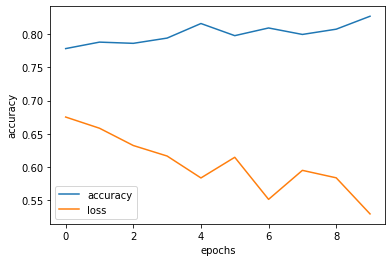

In [29]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['loss'],label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [30]:
print(model.evaluate(train))

34/52 [==================>...........] - ETA: 12s

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


52/52 [==============================] - 33s 640ms/step
[0.1573140025138855, 0.8532277941703796]


In [37]:
model.predict_classes(test,batch_size=None)

array([7, 4, 8, 5, 0, 7, 7, 3, 6, 9, 6, 6, 2, 8, 9, 6, 4, 1, 1, 9, 6, 6,
       9, 1, 5, 3, 4, 9, 2, 9, 4, 7, 9, 9, 4, 4, 0, 3, 9, 4, 6, 0, 5, 4,
       4, 3, 1, 9, 9, 6, 2, 8, 2, 1, 2, 9, 7, 8, 3, 2, 1, 1, 9, 7, 6, 2,
       4, 2, 2, 4, 2, 6, 6, 3, 9, 4, 7, 7, 1, 1, 8, 9, 2, 5, 1, 6, 2, 2,
       6, 0, 8, 7, 2, 6, 9, 1, 9, 4, 9, 5, 9, 6, 0, 6, 2, 0, 9, 2, 3, 8,
       8, 1, 9, 5, 0, 1, 2, 5, 8, 1, 9, 6, 6, 5, 6, 2, 1, 7, 9, 9, 2, 6,
       1, 0, 1, 4, 2, 2, 6, 6, 9, 9, 9, 9, 7, 6, 7, 1, 9, 7, 2, 0, 4, 1,
       7, 4, 2, 6, 3, 1, 1, 2, 2, 2, 5, 6, 1, 6, 6, 1, 1, 9, 1, 6, 3, 2,
       9, 9, 7, 6, 6, 1, 1, 1, 6, 6, 6])

#USING TRANSFER LEARNING: **VGG16 MODEL**

In [44]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import adam

from keras.applications.vgg16 import VGG16
model = VGG16(include_top= False ,input_shape=(64,64,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [45]:
for i in range(len(model.layers)):
  print(i,model.layers[i])
  model.layers[i].trainable=False

0 <keras.engine.input_layer.InputLayer object at 0x7f613a137550>
1 <keras.layers.convolutional.Conv2D object at 0x7f613a137588>
2 <keras.layers.convolutional.Conv2D object at 0x7f613a137d68>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f613a198668>
4 <keras.layers.convolutional.Conv2D object at 0x7f613a198470>
5 <keras.layers.convolutional.Conv2D object at 0x7f613a198f98>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f613a112d30>
7 <keras.layers.convolutional.Conv2D object at 0x7f613a112b70>
8 <keras.layers.convolutional.Conv2D object at 0x7f613b83c5f8>
9 <keras.layers.convolutional.Conv2D object at 0x7f613b843438>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f613b843e80>
11 <keras.layers.convolutional.Conv2D object at 0x7f613b843cc0>
12 <keras.layers.convolutional.Conv2D object at 0x7f613b848f28>
13 <keras.layers.convolutional.Conv2D object at 0x7f613b84e588>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f613b84ee10>
15 <keras.layers.convolutional.Conv2D object at 

In [46]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [47]:
a=GlobalAveragePooling2D()(model.output)
d=Dense(512,activation='relu')(a)
e=Dense(128,activation='relu')(d)
f=Dense(10,activation='softmax')(e)
model_new = Model(input=model.input,output=f)
model_new.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [0]:
model_new.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
his=model_new.fit_generator(train,epochs=5
                          )

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


52/52 [==============================] - 53s 1s/step - loss: 0.3456 - accuracy: 0.8788
Epoch 2/5
52/52 [==============================] - 53s 1s/step - loss: 0.3915 - accuracy: 0.8709
Epoch 3/5
52/52 [==============================] - 53s 1s/step - loss: 0.3187 - accuracy: 0.8952
Epoch 4/5
52/52 [==============================] - 53s 1s/step - loss: 0.3111 - accuracy: 0.8910
Epoch 5/5
52/52 [==============================] - 53s 1s/step - loss: 0.3140 - accuracy: 0.9050


In [56]:
model_new.evaluate(train)

19/52 [=========>....................] - ETA: 34s

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


52/52 [==============================] - 53s 1s/step


[0.5849353671073914, 0.8989037871360779]

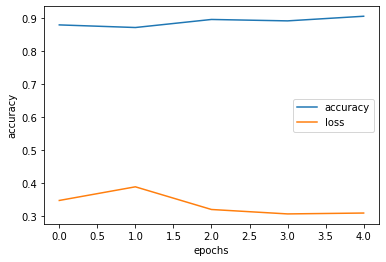

In [57]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['loss'],label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [0]:
x=model_new.predict(test)

In [61]:
pred=[np.argmax(i) for i in x]
print(pred)

[7, 4, 8, 0, 0, 7, 7, 0, 6, 9, 6, 6, 4, 8, 9, 6, 4, 1, 1, 9, 6, 6, 9, 1, 9, 3, 9, 7, 2, 1, 4, 7, 9, 9, 8, 6, 0, 3, 9, 5, 6, 0, 9, 9, 4, 3, 1, 9, 9, 6, 2, 8, 2, 1, 9, 9, 7, 8, 3, 2, 1, 1, 9, 7, 6, 2, 9, 2, 2, 4, 2, 6, 6, 3, 3, 4, 7, 7, 9, 1, 8, 1, 7, 1, 1, 6, 6, 6, 6, 0, 8, 5, 2, 6, 6, 1, 9, 8, 9, 6, 9, 6, 0, 6, 2, 0, 6, 9, 3, 8, 5, 1, 7, 8, 0, 1, 2, 7, 8, 1, 9, 6, 2, 4, 6, 2, 1, 6, 9, 1, 9, 6, 1, 0, 1, 4, 6, 9, 6, 6, 9, 9, 9, 9, 9, 6, 7, 1, 9, 7, 1, 0, 1, 1, 7, 4, 2, 6, 3, 1, 9, 2, 2, 2, 4, 5, 1, 6, 6, 1, 1, 9, 1, 1, 3, 2, 9, 3, 7, 6, 6, 1, 1, 1, 6, 9, 6]
